# Steps in the Code:

## Data Loading and Preprocessing:
1. Read the datasets.
2. Merge them to create a unified dataset.
3. Perform feature engineering to calculate total spending, transaction count, and average purchase value.

## Data Transformation:
1. Encode categorical features (e.g., `Region`).
2. Normalize the data using `StandardScaler`.

## Clustering:
1. Perform KMeans clustering for 2 to 10 clusters.
2. Evaluate each clustering result using the Davies-Bouldin Index.
3. Select the optimal number of clusters based on the lowest DB Index.

## Visualization:
- Plot a scatterplot of clusters based on `TotalSpending` and `AvgPurchaseValue`.

## Output:
- Save the clustered dataset for further use.

## Requirements:
- **Libraries**: `pandas`, `numpy`, `scikit-learn`, `matplotlib`, `seaborn`
- Save your `.csv` files in the working directory.
 or assistance! 




In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Load the datasets
customers = pd.read_csv(r"C:\Users\krish\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\krish\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\krish\Downloads\Transactions.csv")


In [11]:


# Preprocessing
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Feature engineering
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Number of transactions
    'Price_y': 'mean',  # Average purchase value
    'Region': 'first',  # Region
}).reset_index()

customer_features.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionCount',
    'Price_y': 'AvgPurchaseValue',
}, inplace=True)

# Encode categorical features
customer_features_encoded = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features_encoded.drop(['CustomerID'], axis=1))

# Clustering using KMeans
cluster_results = []
for n_clusters in range(2, 11):  # Trying between 2 and 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, labels)
    cluster_results.append((n_clusters, db_index, labels))

# Find the best number of clusters based on DB Index (lower is better)
optimal_clusters = min(cluster_results, key=lambda x: x[1])
n_clusters, db_index, best_labels = optimal_clusters

# Add cluster labels to the original data
customer_features_encoded['Cluster'] = best_labels

# Print results
print(f"Optimal number of clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")



Optimal number of clusters: 10
Davies-Bouldin Index: 0.9481


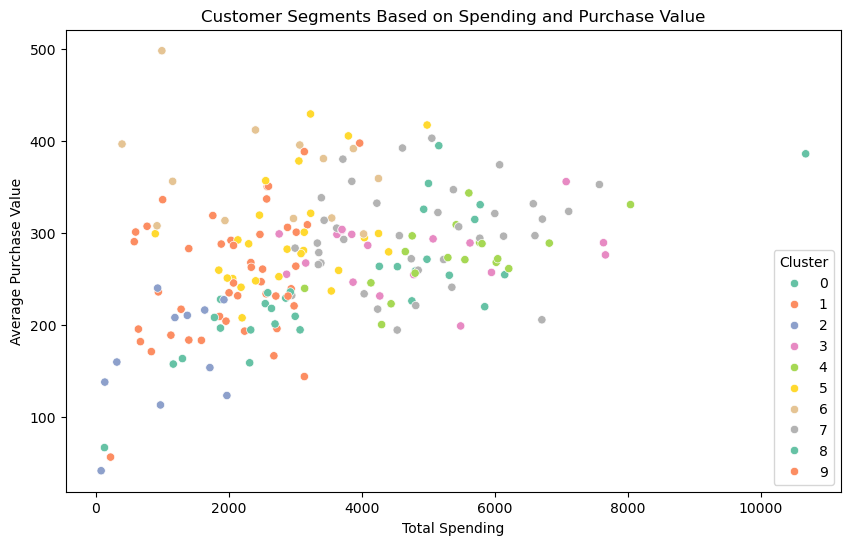

In [9]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features_encoded['TotalSpending'],
    y=customer_features_encoded['AvgPurchaseValue'],
    hue=customer_features_encoded['Cluster'],
    palette="Set2"
)
plt.title("Customer Segments Based on Spending and Purchase Value")
plt.xlabel("Total Spending")
plt.ylabel("Average Purchase Value")
plt.legend(title="Cluster")
plt.show()

# Save the clustered dataset
customer_features_encoded.to_csv("Customer_Clusters.csv", index=False)
